# Intel Dataset Image Classification using RESNET50

This Data contains around 25k images of size 150x150 distributed under 6 categories.

* 'buildings' -> 0,

* 'forest' -> 1,

* 'glacier' -> 2,

* 'mountain' -> 3,

* 'sea' -> 4,

* 'street' -> 5 

## Install The Required Libraries

In [2]:
!pip install opendatasets visualkeras -q

## Import the libraries

In [3]:
import numpy as np
import tensorflow as tf
import os
import opendatasets as od
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib
import matplotlib.pyplot as plt
import visualkeras
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Download the dataset

In [4]:
url='https://www.kaggle.com/datasets/puneet6060/intel-image-classification'

In [5]:
od.download(url)

Skipping, found downloaded files in "./intel-image-classification" (use force=True to force download)


## Dataset Paths

In [6]:
path_train = './intel-image-classification/seg_train/seg_train'
path_val = './intel-image-classification/seg_test/seg_test'

## Data Preprocessing

In [7]:
datagen = ImageDataGenerator(rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,)
train_generator = datagen.flow_from_directory(path_train,
                                              batch_size =50 ,
                                              target_size = (150,150)) 
valgen = ImageDataGenerator(rescale = 1./255)
validation_generator =  valgen.flow_from_directory( path_val,
                                                   batch_size  = 100, 
                                                   target_size = (150, 150),shuffle=False)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


## Resnet50 Pretrained weights

In [8]:
resnet50 = tf.keras.applications.resnet50.ResNet50(weights="imagenet", include_top=False,input_shape = (150,150,3))

### Model Summary

In [9]:
model = Sequential()
model.add(resnet50)
model.add(Flatten())
model.output_shape
model.add(Dense(1000,activation = 'relu'))
model.add(Dense(6,activation = 'softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 1000)              51201000  
                                                                 
 dense_1 (Dense)             (None, 6)                 6006      
                                                                 
Total params: 74,794,718
Trainable params: 74,741,598
Non-trainable params: 53,120
_________________________________________________________________
None


### Compiling Model

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

## Neural Network Visulaization

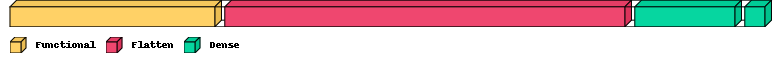

In [11]:
visualkeras.layered_view(model, legend=True)

## Fine Tunning Resnet50 Neural Network

In [12]:
with tf.device(tf.DeviceSpec(device_type="GPU", device_index=1)):
  history = model.fit_generator(generator=train_generator,validation_data=validation_generator,epochs=7,workers=4)

Epoch 1/7
281/281 [==============================] - 119s 345ms/step - loss: 0.7198 - accuracy: 0.8097 - val_loss: 2.5317 - val_accuracy: 0.2577
Epoch 2/7
281/281 [==============================] - 94s 330ms/step - loss: 0.3327 - accuracy: 0.8810 - val_loss: 1.0071 - val_accuracy: 0.6050
Epoch 3/7
281/281 [==============================] - 94s 331ms/step - loss: 0.2877 - accuracy: 0.8981 - val_loss: 0.4172 - val_accuracy: 0.8563
Epoch 4/7
281/281 [==============================] - 94s 329ms/step - loss: 0.2504 - accuracy: 0.9127 - val_loss: 0.4096 - val_accuracy: 0.8663
Epoch 5/7
281/281 [==============================] - 95s 334ms/step - loss: 0.2357 - accuracy: 0.9170 - val_loss: 0.2415 - val_accuracy: 0.9157
Epoch 6/7
281/281 [==============================] - 94s 331ms/step - loss: 0.2132 - accuracy: 0.9228 - val_loss: 0.2815 - val_accuracy: 0.9103
Epoch 7/7
281/281 [==============================] - 95s 335ms/step - loss: 0.2014 - accuracy: 0.9273 - val_loss: 0.2616 - val_accuracy

## Model Evaluation

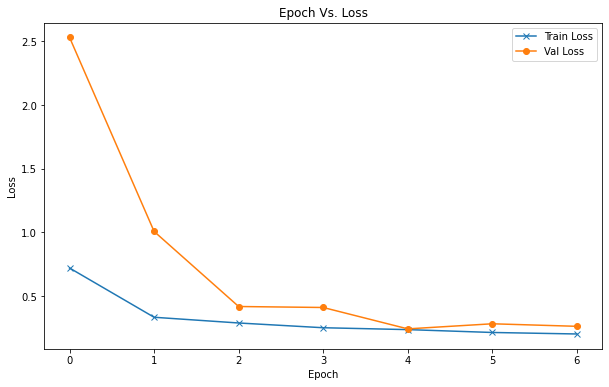

In [13]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],'-x');
plt.plot(history.history['val_loss'],'-o')
plt.legend(['Train Loss','Val Loss'])
plt.title('Epoch Vs. Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch');

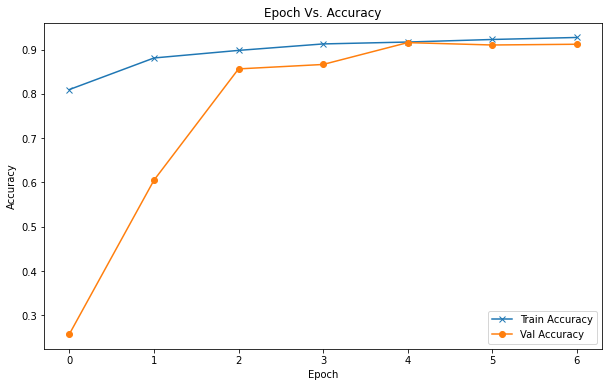

In [14]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'],'-x');
plt.plot(history.history['val_accuracy'],'-o')
plt.legend(['Train Accuracy','Val Accuracy'])
plt.title('Epoch Vs. Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch');

## Predicting  with input images using Gradio GUI

In [ ]:
!pip install gradio -q

In [16]:
from keras.preprocessing import image
import gradio as gr

In [37]:
labels = list(validation_generator.class_indices.keys())
def pred_img(img): 
  test_image = image.img_to_array(img)
  img_rescale = image.img_to_array(img)/255
  img_expand = np.expand_dims(img_rescale, axis = 0)
  pred_proba = model.predict(img_expand)
  result = labels[pred_proba.argmax()]
  return result

In [38]:
gui = gr.Interface(pred_img, gr.Image(shape=(150, 150)), outputs="text",title='Landmark Detector')
gui.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://11739.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7fc1ce390d90>,
 'http://127.0.0.1:7863/',
 'https://11739.gradio.app')